# Modelos epidemiológicos en autómatas celulares

En el siguiente cuadernillo abordaremos varios de los ejemplos descritos en el capítulo 3 del [documento](https://github.com/Grupo-de-simulacion-con-automatas/CAsimulations-Modelacion-de-dinamicas-topologicas-en-la-propagacion-de-una-enfermedad-usando-CA/blob/master/Documentos/Proyecto_de_grado.pdf), esto con el objetivo de brindar al lector la posibilidad de replicar cada uno de los casos analizados.

## Interacciones e impactos sociales

### Ejemplo 3.1.5:
Consideremos las siguientes matrices que describen los grados de impacto en tres distintos sistemas fundamentales de vecindades para la célula en la posición 2,2:

![Grados de impacto en diferentes sistemas de vecindades](Imagenes/ex315.PNG)

En la figura anterior podemos ver que debido a la manera en la que implementamos nuestro espacio de células, es posible representar los grados de impacto de cada una con una célula particular en un arreglo matricial, al igual que los estados de cada célula como se vio en el capítulo dos.

La asignación entre grados y tasas de impacto puede escogerse de cualquier manera dependiendo del contexto y la enfermedad que esté modelando. Para los efectos del ejemplo, consideraremos las siguientes matrices de tasas de impacto:

![Tasas de impacto en diferentes sistemas de vecindades](Imagenes/ex3152.PNG)

La librería CAsimulations nos permite parametrizar este tipo de escenarios, como se muestra a continuación:

In [1]:
# Inicialmente se importa la librería
from EpidemiologicalModels.epidemiologicalModelsInCA import *

# Establecemos un conjunto de células cualquiera
cellSpace_ex1 = CellSpace(5,5)  # Espacio de células con dimensión igual a 5x5
cellSpace_ex1.system

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [2]:
import numpy as np

# Sistemas de vecindades para la posición 2,2 con sus respectivos grados de impacto
x11_VonNeumann = [[1,1], np.array([[1,0,1,1,1], [0,0,0,1,1], [1,0,1,1,1], [1,1,1,1,1], [1,1,1,1,1]])]
x11_Moore2 = [[1,1], np.array([[0,0,0,1,2], [0,0,0,1,2], [0,0,0,1,2], [1,1,1,1,2], [2,2,2,2,2]])]
x11_SFV1 = [[1,1], np.array([[2,1,3,0,2], [0,0,2,1,0], [0,0,2,3,1], [3,1,1,0,2], [0,2,1,0,3]])]

x11_SFV1

[[1, 1],
 array([[2, 1, 3, 0, 2],
        [0, 0, 2, 1, 0],
        [0, 0, 2, 3, 1],
        [3, 1, 1, 0, 2],
        [0, 2, 1, 0, 3]])]

In [3]:
# Tasas de impacto
impactRates_VonNeumann = [1,0]  # Para los grados [0,1]
impactRates_Moore2 = [1,0.5,0]  # Para los grados [0,1,2]
impactRates_SFV1 = [0.5,0.25,0.1,0]  # Para los grados [0,1,2,3]

## Reglas de evolución
### Ejemplo 3.2.6

Consideremos dos espacios de 900 células en donde una misma enfermedad actúa de manera diferente en el sentido de que mientras en el primer espacio los individuos no generan inmunidad tras recuperarse de la enfermedad, en el segundo espacio si y durante un tiempo indefinido. Las tasas de infección y de recuperación de la enfermedad son $\beta=0.5$ y $\alpha=0.2$, lo que implica que la enfermedad será endémica, pues $\mathcal{R}_0=\frac{\beta}{\alpha}=2.5>1$. Asumiremos que el brote de infectados inicial se ubicó en la zona central de ambos espacios y que las interacciones entre células se describen a partir del sistema de vecindades generado por las vecindades de Moore.

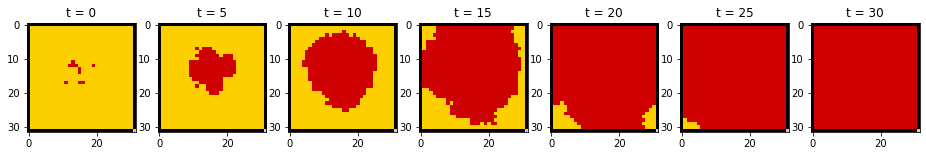

In [4]:
import matplotlib.pyplot as plt

# Librería para ajustar el tamaño de la imágen
from IPython.core.pylabtools import figsize
figsize(16,6)

# Establecemos un conjunto de células cualquiera
cellSpace_ex2 = CellSpace(30, 30)  # Espacio de 900 células

# Condición inicial
cellSpace_ex2.system = cellSpace_ex2.initialLocationOfInfected(0.1, "center")

# Sistema de vecindades
neighborhoodSystem = GenerateNeighborhoodSystem(cellSpace_ex2, "Moore")

# Tasas de impacto
impactRates = [1,0]

# Parámetros de la enfermedad
beta = 0.5
alpha = 0.2

# Modelo SIS
esc1 = SIS(alpha, beta, 30, cellSpace_ex2, neighborhoodSystem, impactRates)

for i in [0,1,2,3,4,5,6]:
    plt.subplot(1,7,i+1)
    plt.title(f"t = {i*5}")
    esc1.plotSpecificIteration(i*5)

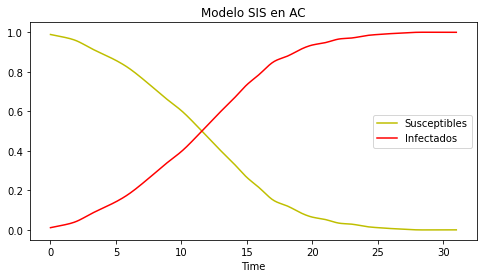

In [29]:
figsize(8,4)

esc1.plotCurvesModel("Modelo SIS en AC")

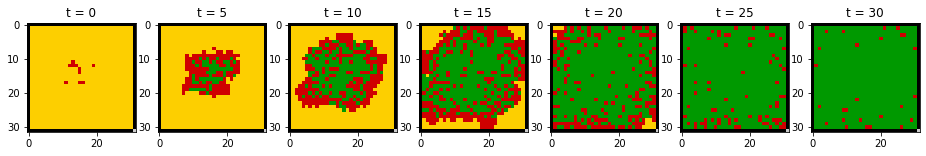

In [5]:
figsize(16,6)

# Modelo SIR
esc2 = SIR(alpha, beta, 30, cellSpace_ex2, neighborhoodSystem, impactRates)

for i in [0,1,2,3,4,5,6]:
    plt.subplot(1,7,i+1)
    plt.title(f"t = {i*5}")
    esc2.plotSpecificIteration(i*5)

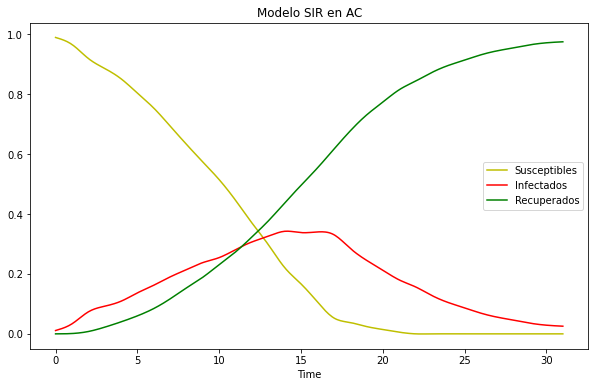

In [28]:
figsize(8,4)
esc2.plotCurvesModel("Modelo SIR en AC")